In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


# Applying Survival model

## 1. 학습하기

## 1-1. Cox Proportional Hazard Model

In [40]:
X_imputed = pd.read_csv('imputed features_final.csv')
Optimal_Gas = pd.read_csv('Optimal_target_with_92_Q3_2점.csv')

In [41]:
sub_list = list(Optimal_Gas['SubjectID'])

In [42]:
X_imputed = X_imputed[['SubjectID','Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory']]

In [43]:
X_imputed.query("SubjectID == {0}".format(sub_list), inplace=True)
sub_list_2 = list(X_imputed['SubjectID'])
X_imputed = X_imputed.reset_index()
X_imputed.drop(columns=['index'], inplace=True)

In [44]:
Optimal_Gas.query("SubjectID == {0}".format(sub_list_2), inplace=True)
Optimal_Gas = Optimal_Gas.reset_index()
Optimal_Gas = Optimal_Gas.iloc[:, 1:]
Optimal_Gas.drop(columns='Unnamed: 0', inplace=True)

In [45]:
X_1 = X_imputed.merge(Optimal_Gas, on='SubjectID', how='inner')

In [46]:
X_1 = X_1[X_1['time_opt']!=0]
y = X_1[['status_opt']]
X_1.drop(columns='SubjectID', inplace=True)

In [47]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(X_1, y, train_size=0.8, test_size=0.2, random_state=11)

In [48]:
df_test.iloc[:,:-2]

,Age,Gender,onset_site,onset_delta,diag_minus_onset,slope_alsfrs_tot,fvc_slope,fvc_mean,mean_Q10_Respiratory,mean_Bulbar,...,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory
189,77.0,1.0,0.0,-719.0,663.0,0.000000,-0.115069,93.000000,4.000000,8.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.0,0.000000
2592,56.0,1.0,0.0,-673.0,161.0,-0.016129,0.538200,106.240632,3.666667,8.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.016129
3177,63.0,1.0,0.0,-678.0,24.0,-0.033708,0.118457,74.346931,2.800000,6.800000,...,-0.011236,0.0,-0.011236,0.011236,0.000000,-0.011236,0.022472,0.000000,0.0,0.000000
3055,66.0,0.0,0.0,-1286.0,183.0,0.000000,-1.083333,69.500000,3.000000,7.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1144,65.0,0.0,0.0,-218.0,217.0,-0.085106,-0.212766,83.000000,4.000000,8.000000,...,0.000000,0.0,0.000000,-0.021277,-0.021277,-0.021277,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,58.0,0.0,0.0,-563.0,461.0,0.000000,-0.068966,102.000000,2.000000,8.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2691,44.0,0.0,0.0,-413.0,318.0,0.000000,0.054054,98.000000,4.000000,6.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
439,64.0,1.0,0.0,-267.0,204.0,-0.089286,0.053571,97.500000,4.000000,8.000000,...,0.000000,0.0,0.000000,-0.017857,-0.035714,0.000000,0.017857,-0.017857,0.0,0.000000
361,39.0,1.0,0.0,-477.0,378.0,-0.024691,0.033612,114.000000,4.000000,8.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.012346,-0.012346,0.0,0.000000


In [49]:
df_train

,Age,Gender,onset_site,onset_delta,diag_minus_onset,slope_alsfrs_tot,fvc_slope,fvc_mean,mean_Q10_Respiratory,mean_Bulbar,...,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,time_opt,status_opt
2870,47.0,0.0,1.0,-657.0,185.0,-0.098592,-0.047781,56.50,2.250000,2.000000,...,-0.042254,0.000000,0.000000,0.014085,0.014085,-0.014085,-0.042254,0.028169,21,1
1753,22.0,1.0,0.0,-370.0,304.0,-0.057471,-0.097511,70.00,3.800000,7.600000,...,0.000000,-0.011494,0.000000,0.000000,0.000000,0.000000,-0.022989,0.000000,274,0
2869,57.0,0.0,0.0,-821.0,305.0,-0.025974,-0.091873,97.50,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.012987,-0.012987,0.000000,0.000000,126,1
267,73.0,0.0,0.0,-784.0,638.0,-0.022727,-0.082821,92.00,3.000000,6.000000,...,0.000000,0.000000,0.000000,-0.011364,0.022727,-0.011364,0.000000,0.000000,152,1
2012,67.0,1.0,0.0,-807.0,702.0,-0.076923,0.078696,97.75,3.666667,7.000000,...,0.000000,-0.019231,0.000000,-0.019231,0.000000,0.000000,0.000000,-0.019231,359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,60.0,0.0,1.0,-630.0,305.0,-0.042857,-0.223541,46.25,2.800000,4.500000,...,-0.014286,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,-0.014286,13,1
1293,62.0,0.0,0.0,-516.0,212.0,-0.010989,-0.285714,81.00,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,343,0
3163,37.0,0.0,0.0,-805.0,518.0,-0.015873,-0.015873,105.50,4.000000,6.000000,...,0.000000,0.000000,-0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,364,0
1104,68.0,0.0,1.0,-966.0,568.0,-0.033333,-0.200000,67.00,4.000000,8.000000,...,0.000000,0.000000,-0.016667,-0.016667,0.000000,-0.016667,0.000000,0.000000,203,0


모델 적용하기

In [50]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train, 'time_opt', event_col='status_opt')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2719 total observations, 1787 right-censored observations>
             duration col = 'time_opt'
                event col = 'status_opt'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 2719
number of events observed = 932
   partial log-likelihood = -6096.35
         time fit was run = 2021-05-28 16:24:00 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
Gender                         -0.04       0.96       0.07            -0.18             0.09                 0.84                 1.10
onset_site                      0.28       1.32       0.10             0.09             0.47                 1.09                 1.60
onset_delta                     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -1.67       0.19       1.48            -4.57             1.23                 0.01                 3.41
fvc_slope                       0.00       1.00       0.10            -0.20             0.20                 0.82                 1.22
fvc_mean                       -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
mean_Q10_Respiratory           -0.09       0.91       0.05            -0.20             0.01                 0.82                 1.01
mean_Bulbar                    -0.73       0.48       0.03            -0.80            -0.67                 0.45                 0.51
mean_motor                     -0.06       0.94       0.01            -0.07            -0.04                 0.93                 0.96
slope_Q1_Speech                -2.33       0.10       2.27            -6.77             2.11                 0.00                 8.25
slope_Q2_Salivation            -3.34       0.04       2.71            -8.64             1.97                 0.00                 7.14
slope_Q3_Swallowing           -11.88       0.00       2.64           -17.05            -6.71                 0.00                 0.00
slope_Q4_Handwriting            5.05     155.30       2.69            -0.22            10.31                 0.80             30062.86
slope_Q5_Cutting               -2.42       0.09       2.14            -6.61             1.76                 0.00                 5.84
slope_Q6_Dressing_and_Hygiene  -0.53       0.59       3.08            -6.57             5.51                 0.00               247.31
slope_Q7_Turning_in_Bed        -1.40       0.25       1.33            -4.00             1.20                 0.02                 3.32
slope_Q8_Walking               -0.25       0.78       3.15            -6.41             5.92                 0.00               372.34
slope_Q9_Climbing_Stairs        0.92       2.51       2.40            -3.78             5.62                 0.02               275.98
slope_Q10_Respiratory          -3.86       0.02       2.48            -8.72             1.00                 0.00                 2.72

                                   z      p   -log2(p)
covariate                                             
Age                             6.58 <0.005      34.34
Gender                         -0.63   0.53       0.92
onset_site                      2.84 <0.005       7.80
onset_delta                     7.13 <0.005      39.82
diag_minus_onset                1.21   0.23       2.15
slope_alsfrs_tot               -1.13   0.26       1.96
fvc_slope          

In [51]:
print(cph.check_assumptions(df_train))

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2719 total observations, 1787 right-censored observations>
         test_name = proportional_hazard_test

---
                                    test_statistic      p  -log2(p)
Age                           km              0.02   0.90      0.16
                              rank            0.02   0.88      0.18
Gender                        km              2.35   0.13      3.00
                              rank            1.13   0.29      1.80
diag_minus_onset              km              2.82   0.09      3.42
                              rank            1.32   0.25      2.00
fvc_mean                      km              2.76   0.10      3.37
                              rank            5.87   0.02      6.02
fvc_slope                     km              2.78   0.10      3.39
                              rank            4.37   0.04      4.78
mean_Bulbar                   km             58.82 <0.005     45.72
                              rank           66.52 <0.005     51.36
mean_Q10_Respiratory          km              0.29   0.59      0.76
                              rank            0.65   0.42      1.25
mean_motor                    km              0.13   0.71      0.49
                              rank            0.80   0.37      1.43
onset_delta                   km             15.90 <0.005     13.87
                              rank           17.53 <0.005     15.11
onset_site                    km              0.18   0.67      0.57
                              rank            1.27   0.26      1.95
slope_Q10_Respiratory         km              0.38   0.54      0.90
                              rank            0.69   0.40      1.31
slope_Q1_Speech               km              0.64   0.42      1.24
                              rank            1.14   0.29      1.80
slope_Q2_Salivation           km              0.67   0.41      1.28
                              rank            1.15   0.28      1.82
slope_Q3_Swallowing           km             22.35 <0.005     18.75
                              rank           30.57 <0.005     24.89
slope_Q4_Handwriting          km              1.22   0.27      1.90
                              rank            2.90   0.09      3.50
slope_Q5_Cutting              km              0.00   0.95      0.07
                              rank            0.04   0.84      0.25
slope_Q6_Dressing_and_Hygiene km              3.22   0.07      3.78
                              rank            3.64   0.06      4.14
slope_Q7_Turning_in_Bed       km              0.03   0.85      0.23
                              rank            0.03   0.86      0.22
slope_Q8_Walking              km              2.61   0.11      3.24
                              rank            1.04   0.31      1.70
slope_Q9_Climbing_Stairs      km              0.10   0.75      0.41
                              rank            0.23   0.63      0.66
slope_alsfrs_tot              km              0.11   0.74      0.43
                              rank            0.03   0.87      0.20



1. Variable 'onset_delta' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'onset_delta' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'onset_delta' using pd.cut, and then specify it in
`strata=['onset_delta', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'mean_Bulbar' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'mean_Bulbar' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to sp

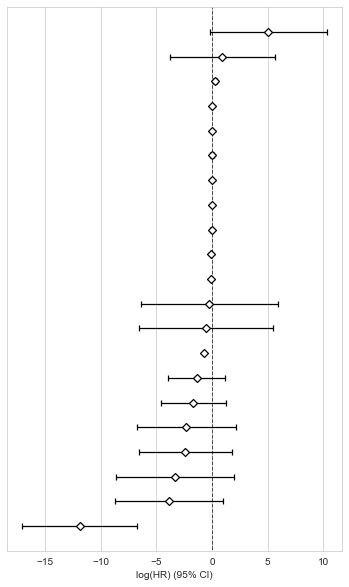

In [52]:
plt.figure(figsize=(6,10))
ax = cph.plot(c='k', marker='D', )
ax.yaxis.set_visible(False)
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함

## 1-2. Random Survival Forest model

In [53]:
from sksurv.ensemble import RandomSurvivalForest

In [54]:
dic = {1:True, 0:False}

df_train_rsf = df_train.iloc[:, -2:][['status_opt', 'time_opt']]
df_train_rsf = df_train_rsf.replace({'status_opt':dic})

In [55]:
arr_1 = list(tuple(x) for x in df_train_rsf.to_records(index=False))
dt = np.dtype('bool, float')
y_train_rsf = np.array(arr_1, dtype=dt)
y_train_rsf.dtype.names=['cens', 'time']
y_train_rsf

array([( True,  21.), (False, 274.), ( True, 126.), ..., (False, 364.),
       (False, 203.), (False, 266.)],
      dtype=[('cens', '?'), ('time', '<f8')])

In [56]:
df_test_rsf = df_test.iloc[:, -2:][['status_opt', 'time_opt']]
df_test_rsf = df_test_rsf.replace({'status_opt':dic})

In [57]:
arr_2 = list(tuple(x) for x in df_test_rsf.to_records(index=False))
dt=np.dtype('bool, float')
y_test_rsf = np.array(arr_2, dtype=dt)
y_test_rsf.dtype.names=['cens', 'time']
y_test_rsf

array([(False,  363.), (False,  456.), (False,  498.), (False,  392.),
       (False,  356.), (False,  312.), ( True,  126.), ( True,  274.),
       (False,  392.), (False,  272.), (False,  395.), (False,  361.),
       ( True,  250.), (False,  140.), ( True,  388.), (False,  284.),
       (False,  176.), (False,  371.), ( True,   37.), ( True,   92.),
       (False,  266.), (False,  415.), ( True,  183.), (False,   23.),
       (False,   35.), (False,  266.), ( True,  276.), (False,  392.),
       (False,  383.), (False,  205.), ( True,  442.), (False,  386.),
       (False,  350.), (False,  316.), ( True,   77.), (False,  446.),
       (False,  182.), ( True,  152.), (False,   30.), (False,  263.),
       (False,  181.), ( True,  231.), (False,  736.), (False,   14.),
       ( True,  231.), (False,  385.), (False,  343.), (False,  374.),
       (False,  260.), (False,  455.), ( True,   65.), ( True,  481.),
       (False,  209.), ( True,  394.), (False,  280.), ( True,   39.),
      

In [58]:
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=8,
                           min_samples_leaf=8,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(df_train.iloc[:,:-2], y_train_rsf)

RandomSurvivalForest(min_samples_leaf=8, min_samples_split=8, n_jobs=-1,
                     random_state=20)

In [59]:
feature_names = df_test.iloc[:, :-2].columns.tolist()
feature_names

['Age',
 'Gender',
 'onset_site',
 'onset_delta',
 'diag_minus_onset',
 'slope_alsfrs_tot',
 'fvc_slope',
 'fvc_mean',
 'mean_Q10_Respiratory',
 'mean_Bulbar',
 'mean_motor',
 'slope_Q1_Speech',
 'slope_Q2_Salivation',
 'slope_Q3_Swallowing',
 'slope_Q4_Handwriting',
 'slope_Q5_Cutting',
 'slope_Q6_Dressing_and_Hygiene',
 'slope_Q7_Turning_in_Bed',
 'slope_Q8_Walking',
 'slope_Q9_Climbing_Stairs',
 'slope_Q10_Respiratory']

In [60]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rsf, n_iter=15, random_state=20)
perm.fit(df_test.iloc[:, :-2], y_test_rsf)

PermutationImportance(estimator=RandomSurvivalForest(min_samples_leaf=8,
                                                     min_samples_split=8,
                                                     n_jobs=-1,
                                                     random_state=20),
                      n_iter=15, random_state=20)

In [61]:
eli5.explain_weights_df(perm, feature_names=feature_names).describe()

,weight,std
count,21.000000,21.000000
mean,0.009665,0.001809
std,0.031034,0.002663
min,-0.000530,0.000298
25%,0.000004,0.000528
50%,0.002255,0.001087
75%,0.003356,0.001937
max,0.143737,0.012825


In [62]:
A = eli5.show_weights(perm, feature_names=feature_names)
A

Weight,Feature
0.1437 ± 0.0256,mean_Bulbar
0.0158 ± 0.0040,slope_Q3_Swallowing
0.0128 ± 0.0054,mean_motor
0.0088 ± 0.0045,slope_alsfrs_tot
0.0048 ± 0.0035,fvc_mean
0.0034 ± 0.0068,onset_site
0.0032 ± 0.0031,Age
0.0027 ± 0.0022,slope_Q2_Salivation
0.0027 ± 0.0022,mean_Q10_Respiratory
0.0025 ± 0.0030,fvc_slope


In [63]:
BB = pd.read_csv('BB2.csv')
BB = BB.transpose()
BB.columns = ['mean_Bulbar', 'slope_Q3_Swallowing', 'mean_motor',
       'slope_alsfrs_tot', 'fvc_mean', 'onset_site', 'Age', 'slope_Q2_Salivation',
              'mean_Q10_Respiratory', 'fvc_slope','onset_delta', 'slope_Q7_Turning_in_Bed','slope_Q1_Speech',
       'slope_Q6_Dressing_and_Hygiene','slope_Q4_Handwriting',
        'slope_Q10_Respiratory','diag_minus_onset', 'Gender',
        'slope_Q9_Climbing_Stairs', 'slope_Q8_Walking', 'slope_Q5_Cutting']
BB = BB.iloc[1:, :]
BB = BB.drop('std')
BB

,mean_Bulbar,slope_Q3_Swallowing,mean_motor,slope_alsfrs_tot,fvc_mean,onset_site,Age,slope_Q2_Salivation,mean_Q10_Respiratory,fvc_slope,...,slope_Q7_Turning_in_Bed,slope_Q1_Speech,slope_Q6_Dressing_and_Hygiene,slope_Q4_Handwriting,slope_Q10_Respiratory,diag_minus_onset,Gender,slope_Q9_Climbing_Stairs,slope_Q8_Walking,slope_Q5_Cutting
weight,0.143737,0.0157985,0.0128258,0.00880817,0.00483118,0.00335615,0.00322537,0.00269125,0.00267886,0.00253088,...,0.000761948,0.000273255,0.000235399,7.43e-05,4.13e-06,-4.27e-05,-8.88e-05,-0.000136283,-0.000317995,-0.000536
max,0.156562,0.0177916,0.0155109,0.0110794,0.00656415,0.00676846,0.00475516,0.0037663,0.00376564,0.00401008,...,0.00128953,0.00221014,0.000945378,0.000458138,0.000458045,0.000397442,0.000497132,0.000161263,0.000170726,0.000111
min,0.130912,0.0138055,0.0101407,0.00653692,0.00309821,-5.62e-05,0.00169559,0.0016162,0.00159209,0.00105168,...,0.000234364,-0.00166363,-0.000474581,-0.000309465,-0.000449785,-0.000482792,-0.000674713,-0.00043383,-0.000806715,-0.001183


Text(0, 0.5, '')

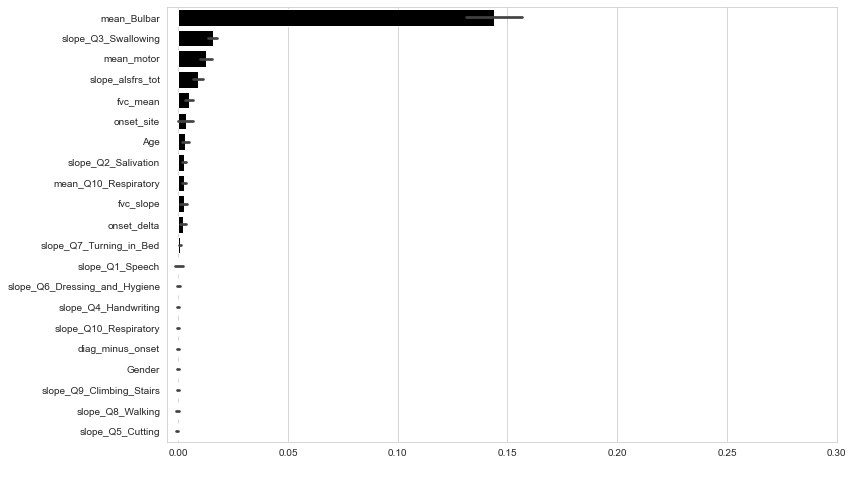

In [64]:
df = pd.DataFrame(data=BB, columns=['mean_Bulbar', 'slope_Q3_Swallowing', 'mean_motor',
       'slope_alsfrs_tot', 'fvc_mean', 'onset_site', 'Age', 'slope_Q2_Salivation',
              'mean_Q10_Respiratory', 'fvc_slope','onset_delta', 'slope_Q7_Turning_in_Bed','slope_Q1_Speech',
       'slope_Q6_Dressing_and_Hygiene','slope_Q4_Handwriting',
        'slope_Q10_Respiratory','diag_minus_onset', 'Gender',
        'slope_Q9_Climbing_Stairs', 'slope_Q8_Walking', 'slope_Q5_Cutting'])

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_style("whitegrid")
sns.barplot(x="value", y="variable", data=pd.melt(df), color='black')
ax.set_xlabel(' ')
ax.set_xlim([-0.005,0.3])
ax.set_ylabel('')

## 2. 평가하기

## 2-1. C-index 계산

## 2-1-1. Repeated 5-fold cross validation on Training set

Cox proportional hazard model

In [65]:
from lifelines.utils import k_fold_cross_validation

In [66]:
cph = CoxPHFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(cph, df_train, 'time_opt', event_col='status_opt', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.82533839 0.86316737 0.81091337 0.82498188 0.84804137 0.82556639
 0.84152479 0.82698277 0.82905291 0.85471472 0.82586175 0.83241893
 0.8470731  0.83381929 0.84331096 0.8276739  0.83372606 0.840754
 0.8476341  0.82774982 0.8436093  0.80298854 0.84789379 0.85442622
 0.82812118 0.82785385 0.81426235 0.84222236 0.82507004 0.86416512
 0.83332532 0.83021244 0.84453343 0.83461782 0.83776963 0.82089552
 0.86934657 0.83905367 0.82250576 0.82648804 0.81615652 0.85722329
 0.84453236 0.82482283 0.83537812 0.83259309 0.84064195 0.84648021
 0.83779208 0.83002696]


Random Survival Forest

In [67]:
df_train_rsf = df_train.iloc[:,:]

In [68]:
df_train_rsf = df_train_rsf.replace({'status_opt':dic})
df_train_rsf

,Age,Gender,onset_site,onset_delta,diag_minus_onset,slope_alsfrs_tot,fvc_slope,fvc_mean,mean_Q10_Respiratory,mean_Bulbar,...,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,time_opt,status_opt
2870,47.0,0.0,1.0,-657.0,185.0,-0.098592,-0.047781,56.50,2.250000,2.000000,...,-0.042254,0.000000,0.000000,0.014085,0.014085,-0.014085,-0.042254,0.028169,21,True
1753,22.0,1.0,0.0,-370.0,304.0,-0.057471,-0.097511,70.00,3.800000,7.600000,...,0.000000,-0.011494,0.000000,0.000000,0.000000,0.000000,-0.022989,0.000000,274,False
2869,57.0,0.0,0.0,-821.0,305.0,-0.025974,-0.091873,97.50,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.012987,-0.012987,0.000000,0.000000,126,True
267,73.0,0.0,0.0,-784.0,638.0,-0.022727,-0.082821,92.00,3.000000,6.000000,...,0.000000,0.000000,0.000000,-0.011364,0.022727,-0.011364,0.000000,0.000000,152,True
2012,67.0,1.0,0.0,-807.0,702.0,-0.076923,0.078696,97.75,3.666667,7.000000,...,0.000000,-0.019231,0.000000,-0.019231,0.000000,0.000000,0.000000,-0.019231,359,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,60.0,0.0,1.0,-630.0,305.0,-0.042857,-0.223541,46.25,2.800000,4.500000,...,-0.014286,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,-0.014286,13,True
1293,62.0,0.0,0.0,-516.0,212.0,-0.010989,-0.285714,81.00,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,343,False
3163,37.0,0.0,0.0,-805.0,518.0,-0.015873,-0.015873,105.50,4.000000,6.000000,...,0.000000,0.000000,-0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,364,False
1104,68.0,0.0,1.0,-966.0,568.0,-0.033333,-0.200000,67.00,4.000000,8.000000,...,0.000000,0.000000,-0.016667,-0.016667,0.000000,-0.016667,0.000000,0.000000,203,False


In [69]:
C_Idx_2 = np.array([])

for i in random_num_list:
    df_train_rsf = df_train_rsf.sample(n=len(df_train_rsf), random_state=i)
    
    y_train_rsf_1 = np.array(list(tuple(x) for x in df_train_rsf.iloc[:2175,-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_1 = np.array(list(tuple(x) for x in df_train_rsf.iloc[2175:,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_2 = np.array(list(tuple(x) for x in df_train_rsf.iloc[543:,-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_2 = np.array(list(tuple(x) for x in df_train_rsf.iloc[0:543,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_3 = np.array(list(tuple(x) for x in df_train_rsf.iloc[np.r_[0:543,1087:],-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_3 = np.array(list(tuple(x) for x in df_train_rsf.iloc[543:1087,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_4 = np.array(list(tuple(x) for x in df_train_rsf.iloc[np.r_[0:1087,1631:],-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_4 = np.array(list(tuple(x) for x in df_train_rsf.iloc[1087:1631,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_5 = np.array(list(tuple(x) for x in df_train_rsf.iloc[np.r_[0:1631,2175:],-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_5 = np.array(list(tuple(x) for x in df_train_rsf.iloc[1631:2175,-2:].to_records(index=False)), dtype=dt)
    
    
    rsf.fit(df_train_rsf.iloc[0:2175,:-2], y_train_rsf_1)
    sco_1 = rsf.score(df_train_rsf.iloc[2175:,:-2], y_test_rsf_1)
    
    rsf.fit(df_train_rsf.iloc[543:,:-2], y_train_rsf_2)
    sco_2 = rsf.score(df_train_rsf.iloc[0:543,:-2], y_test_rsf_2)
    
    rsf.fit(df_train_rsf.iloc[np.r_[0:543,1087:],:-2], y_train_rsf_3)
    sco_3 = rsf.score(df_train_rsf.iloc[543:1087,:-2], y_test_rsf_3)
    
    rsf.fit(df_train_rsf.iloc[np.r_[0:1087,1631:],:-2], y_train_rsf_4)
    sco_4 = rsf.score(df_train_rsf.iloc[1087:1631,:-2], y_test_rsf_4)
    
    rsf.fit(df_train_rsf.iloc[np.r_[0:1631,2175:],:-2], y_train_rsf_5)
    sco_5 = rsf.score(df_train_rsf.iloc[1631:2175,:-2], y_test_rsf_5)
    
    C_Idx_2 = np.append (C_Idx_2, [sco_1, sco_2, sco_3, sco_4, sco_5])

print(C_Idx_2)

[0.79856323 0.80802823 0.84116144 0.86159668 0.85775215 0.79354934
 0.76485097 0.88547705 0.87647059 0.84989593 0.81461634 0.75965202
 0.88178574 0.85814129 0.84611822 0.80222119 0.75896921 0.87374173
 0.85619384 0.86353461 0.77697766 0.78108733 0.84970488 0.83640728
 0.84237377 0.78090563 0.77908847 0.82972596 0.88009613 0.88272603
 0.7893319  0.75300292 0.87450888 0.85383121 0.85257519 0.80545957
 0.75667628 0.87619722 0.86395642 0.87189218 0.80820869 0.7779547
 0.84517554 0.87592274 0.86256535 0.77405336 0.79934984 0.84462567
 0.85387282 0.89401007]


In [74]:
from lifelines import WeibullAFTFitter
aft = WeibullAFTFitter()
C_Idx_3 = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(aft, df_train, 'time_opt', event_col='status_opt', k=5, scoring_method="concordance_index")
    C_Idx_3 = np.concatenate((C_Idx_3, arr))
print(C_Idx_3)

[0.82379859 0.84632227 0.83919902 0.84814402 0.81759827 0.82866068
 0.84692505 0.84471069 0.82222501 0.82895766 0.82317793 0.85405621
 0.84444546 0.80902244 0.82666493 0.8297225  0.82215444 0.84112063
 0.85120215 0.83385554 0.83192345 0.82075381 0.83953664 0.84488705
 0.83553355 0.83806217 0.80887481 0.84984272 0.84424358 0.82862977
 0.83200672 0.82003982 0.85615989 0.84007482 0.82479132 0.82610914
 0.85247028 0.80828531 0.84748413 0.83636923 0.81901216 0.83367333
 0.86315656 0.83248265 0.82841398 0.82930795 0.82501804 0.856979
 0.82770982 0.82708482]


Comparing C-index values between Cox & RSF

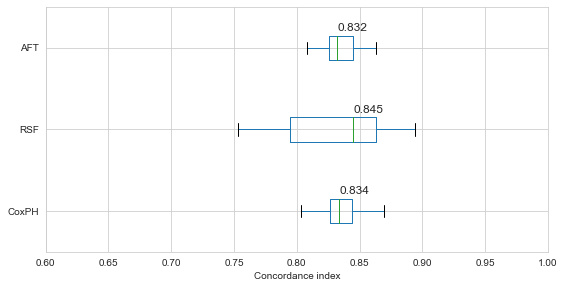

In [75]:
df = pd.DataFrame([C_Idx, C_Idx_2,C_Idx_3], index=['CoxPH', 'RSF','AFT'])
df2 = df.transpose()

colors = ['#000000', '#000000', '#ff7f00']
colors_setosa = dict(color=colors[0])
colors_versicolor = dict(color=colors[1])
colors_versicolor2 = dict(color=colors[2])

aft_median = np.median(df2['AFT'])
rsf_median = np.median(df2['RSF'])
cox_median = np.median(df2['CoxPH'])

fig, ax = plt.subplots(figsize=(9,4.5))
ax = df2.boxplot(column=['CoxPH', 'RSF', 'AFT'], vert=False)
plt.annotate(str(np.round(aft_median,3)), xy=(aft_median, 0.8)
                , xytext=(aft_median, 3.205) , fontsize=12)
plt.annotate(str(np.round(rsf_median,3)), xy=(aft_median, 0.8)
                , xytext=(rsf_median, 2.205) , fontsize=12)
plt.annotate(str(np.round(cox_median,3)), xy=(aft_median, 0.8)
                , xytext=(cox_median, 1.205) , fontsize=12)
plt.xlim([.6,1.0])
plt.xlabel('Concordance index')
plt.show()

In [ ]:
rect1 = matplotlib.patches.Rectangle((-200,-100), 400, 200, color='yellow')
ax.add_patch(rect1)

## 2-1-2. C-index on Test set

In [ ]:
from lifelines.utils import concordance_index
cph = CoxPHFitter().fit(df_test, 'time_opt', 'status_opt')
print('COXPH shows c-index ', concordance_index(df_test['time_opt'], -cph.predict_partial_hazard(df_test), df_test['status_opt']))

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_features':['auto', 'sqrt','log2', None],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [ ]:
rf = RandomSurvivalForest(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
GG = grid_cv.fit(df_train.iloc[:,:-2], y_train_rsf)

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

비례위험 가정 검토

In [ ]:
print(cph.check_assumptions(training_df=df_test, p_value_threshold=0.05))

## 2-2. Individual Prediction on Test set

In [ ]:
df_test_X = df_test.drop(columns=['time_opt', 'status_opt'])

In [ ]:
# Selecting 3 random subjects to predict survival
test_1 = df_test_X.iloc[-7:-2, :]

In [ ]:
result = cph.predict_survival_function(test_1)

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
result = cph.predict_survival_function(test_1)
ax = sns.lineplot(data = result)
ax.set(xlabel='Time in days', ylabel='Survival probability')
ax.set_title("COXPH")

In [ ]:
surv = rsf2.predict_survival_function(df_test.iloc[-7:-2, :-2], return_array=True)
fig, ax = plt.subplots(figsize=(13,7))
for i, s in enumerate(surv):
    plt.step(rsf2.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.title("RSF")
plt.show()

In [ ]:
df_test.iloc[-7:-2, -2:]

In [ ]:
rsf.event_times_